# Red neuronal para predecir el precio de una vivienda

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings('ignore')

In [ ]:
dataFrame=pd.read_csv('SaratogaHouses.csv')
dataFrame

,precio,tamano_lote,antiguedad,precio_terreno,area_construida,universitarios,dormitorios,chimeneas,banos,habitaciones,calefaccion,consumo_calefaccion,desague,vistas_lago,nueva_construccion,aire_acondicionado
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,0.38,32,24200,2310,61,5,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1724,285000,0.94,37,36200,2564,61,4,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3,hot air,gas,public/commercial,No,No,No
1726,125000,0.24,48,16800,1225,51,3,1,1.0,7,hot air,gas,public/commercial,No,No,No


In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   precio               1728 non-null   int64  
 1   tamano_lote          1728 non-null   float64
 2   antiguedad           1728 non-null   int64  
 3   precio_terreno       1728 non-null   int64  
 4   area_construida      1728 non-null   int64  
 5   universitarios       1728 non-null   int64  
 6   dormitorios          1728 non-null   int64  
 7   chimeneas            1728 non-null   int64  
 8   banos                1728 non-null   float64
 9   habitaciones         1728 non-null   int64  
 10  calefaccion          1728 non-null   object 
 11  consumo_calefaccion  1728 non-null   object 
 12  desague              1728 non-null   object 
 13  vistas_lago          1728 non-null   object 
 14  nueva_construccion   1728 non-null   object 
 15  aire_acondicionado   1728 non-null   o

# Se separan los datos en entrenamiento y prueba


In [ ]:
train_data,test_data=sklearn.model_selection.train_test_split(dataFrame, test_size=0.2)
print(len(train_data),len(test_data))

1382 346


In [ ]:
train_data.head(5)

,precio,tamano_lote,antiguedad,precio_terreno,area_construida,universitarios,dormitorios,chimeneas,banos,habitaciones,calefaccion,consumo_calefaccion,desague,vistas_lago,nueva_construccion,aire_acondicionado
1258,218500,0.17,5,37600,1170,62,2,1,2.5,4,hot air,gas,public/commercial,No,No,No
690,95000,0.33,34,54800,1368,57,2,0,1.0,6,hot air,gas,public/commercial,No,No,No
1659,169000,0.19,15,6800,1301,40,3,0,1.5,4,hot air,gas,public/commercial,No,No,No
1610,199900,0.63,38,22100,1742,52,4,1,1.0,10,hot water/steam,gas,septic,No,No,Yes
593,135000,0.26,33,50600,1472,57,3,0,1.0,8,hot air,gas,public/commercial,No,No,No


# Pipeline para los atributos categóricos

In [ ]:
# 6 atributos categóricos
cat_attribs = ['calefaccion','consumo_calefaccion','desague','vistas_lago','nueva_construccion','aire_acondicionado']

cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse_output=False))
    ])

# Pipeline para los atributos numéricos

In [ ]:
# 9 atributos numéricos
num_attribs = ['tamano_lote','antiguedad','precio_terreno','area_construida','universitarios','dormitorios','chimeneas','banos','habitaciones']

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

# Pipeline completo

In [ ]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [ ]:
X_train = full_pipeline.fit_transform(train_data)

In [ ]:
X_train.shape

(1382, 24)

Quedan 24 valores por el OneHotEncoding (9 de los atributos numéricos + 15 (3+3+3+2+2+2) de los categóricos)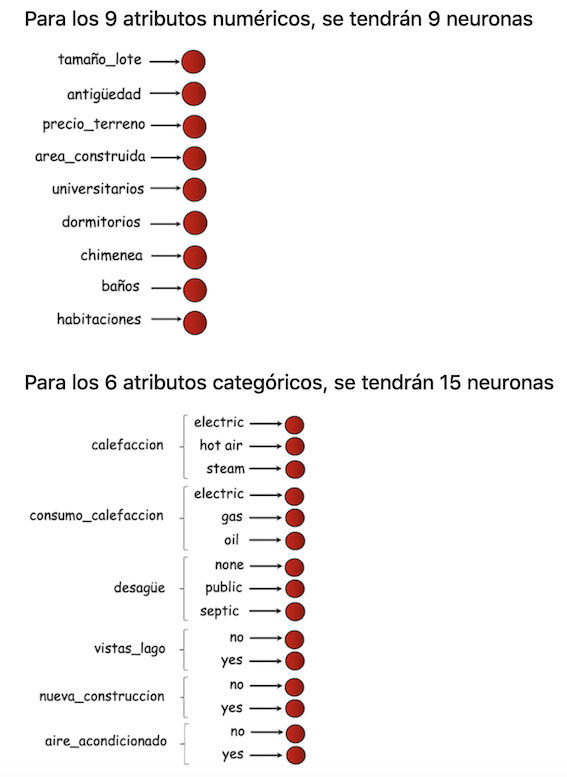

In [ ]:
X_train[0,:]

array([-0.45972284, -0.78037121,  0.07996753, -0.93125489,  0.64059998,
       -1.38043826,  0.74620208,  0.92791903, -1.29868058,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ])

In [ ]:
y_train = train_data["precio"]
y_train

,precio
1258,218500
690,95000
1659,169000
1610,199900
593,135000
...,...
595,337020
384,140000
1695,245000
1630,335000


# Entrenamiento de las redes neuronales


In [ ]:
# funciones de activacion: identity’, ‘logistic’, ‘tanh’, ‘relu’
# solver: ‘lbfgs’, ‘sgd’, ‘adam’
modelo1 = MLPRegressor(activation='relu',solver='lbfgs', hidden_layer_sizes=(3,5))
modelo1.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(3, 5), solver='lbfgs')

In [ ]:
modelo2 = MLPRegressor(activation='tanh',solver='lbfgs', hidden_layer_sizes=(5,4,2))
modelo2.fit(X_train, y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=(5, 4, 2), solver='lbfgs')

# Ahora se usan los modelos en el conjunto de prueba

In [ ]:
X_test = full_pipeline.transform(test_data)

In [ ]:
predicciones1 = modelo1.predict(X_test)
predicciones1

array([174909.09989486, 305156.6656497 , 425954.36611999, 136590.29348361,
       242701.66322625, 152510.86951415, 178936.49198271, 277459.91841023,
       306209.90557025, 177632.48666582, 283045.07145912, 185866.78477821,
       173529.7746827 , 191750.25736737, 191689.60727725, 245099.10006867,
       130837.27102012, 341132.75148455, 187189.77942997, 181064.01656584,
       252783.66950789, 259479.83449651, 130952.621721  , 122097.72559411,
       145142.93167937, 211004.05150786, 198241.22932041, 422599.9309154 ,
       296317.52033227, 269912.67433268, 169107.43332247, 152458.24556064,
       286302.6388796 , 189539.69382872, 233656.42601276, 143976.63868064,
       188266.85680778, 298260.03833056, 634416.49419243, 148598.42360828,
       255557.52957551, 153151.85118655, 424184.56885932, 372035.42906981,
       204893.52768681, 207622.51854845, 243862.45114765, 268181.57668114,
       164450.65955426, 189095.14107582, 214092.72947927, 132840.05932419,
       182400.46530516, 2

In [ ]:
predicciones2 = modelo2.predict(X_test)
predicciones2

array([215053.51798872, 215053.51798872, 215053.51798872, 215053.51798872,
       215053.51798872, 215053.51798872, 215053.51798872, 215053.51798872,
       215053.51798872, 215053.51798872, 215053.51798872, 215053.51798872,
       215053.51798872, 215053.51798872, 215053.51798872, 215053.51798872,
       215053.51798872, 215053.51798872, 215053.51798872, 215053.51798872,
       215053.51798872, 215053.51798872, 215053.51798872, 215053.51798872,
       215053.51798872, 215053.51798872, 215053.51798872, 215053.51798872,
       215053.51798872, 215053.51798872, 215053.51798872, 215053.51798872,
       215053.51798872, 215053.51798872, 215053.51798872, 215053.51798872,
       215053.51798872, 215053.51798872, 215053.51798872, 215053.51798872,
       215053.51798872, 215053.51798872, 215053.51798872, 215053.51798872,
       215053.51798872, 215053.51798872, 215053.51798872, 215053.51798872,
       215053.51798872, 215053.51798872, 215053.51798872, 215053.51798872,
       215053.51798872, 2

In [ ]:
y_test = test_data["precio"]

In [ ]:
y_test

,precio
1391,222000
391,199000
310,255000
1428,124000
1226,367000
...,...
1482,176000
1128,230000
98,113400
1117,145000


In [ ]:
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = predicciones1
       )
print(f"El error medio absoluto del modelo 1 es: {mae}")

El error medio absoluto del modelo 1 es: 41626.41024374141


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = predicciones2
       )
print(f"El error medio absoluto del modelo 2 es: {mae}")

El error medio absoluto del modelo 2 es: 69922.66736315675
